In [1]:
def min_max_scaler(data):
    mn = min(data)
    mx = max(data)
    data -= mn
    data /= (mx-mn)
    return data

[2905.37691679 2905.39734896 2905.41778113 ... 2984.22281491 2984.24324676
 2984.2636787 ] 3357 bkjd
<class 'lightkurve.lightcurve.LightCurve'> <class 'lightkurve.targetpixelfile.KeplerTargetPixelFile'>
3197


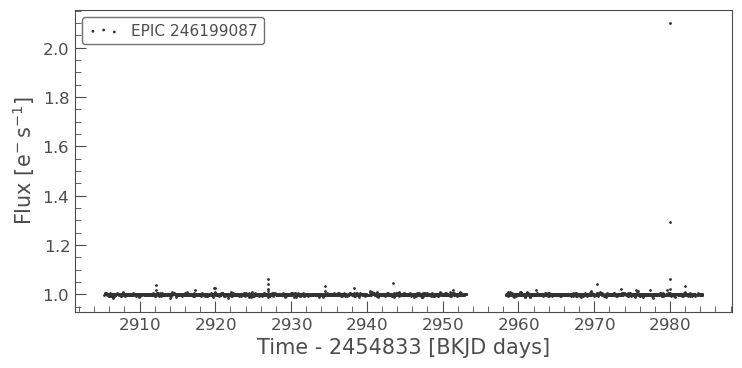

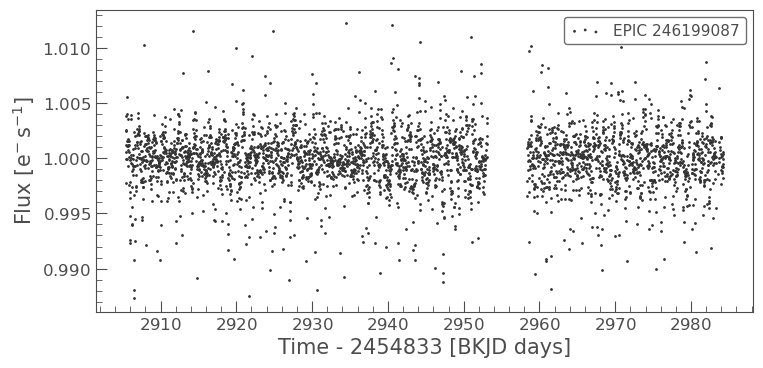

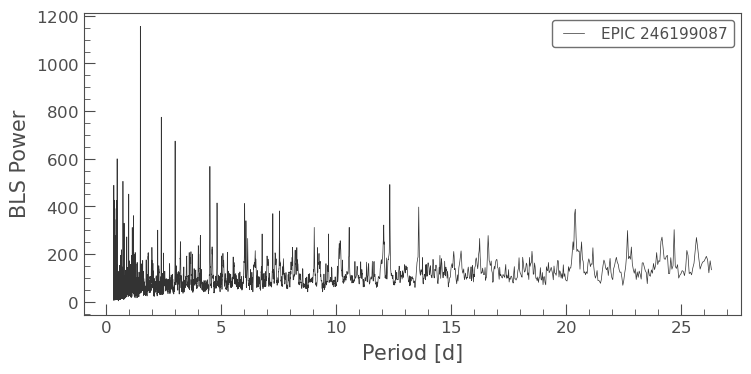

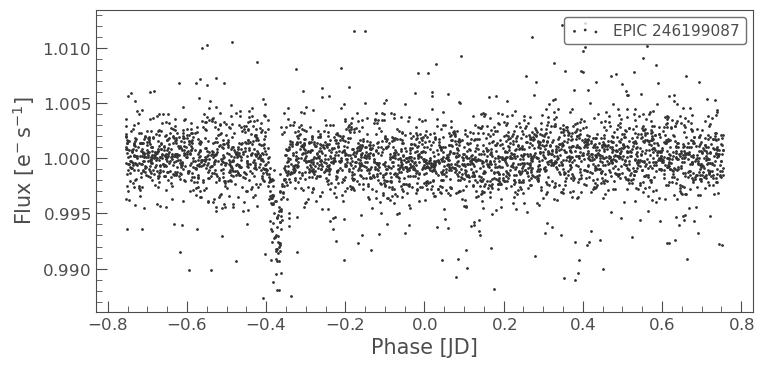

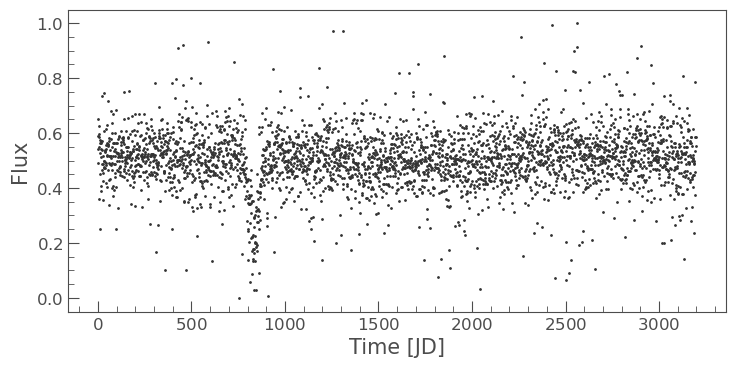

In [2]:
import lightkurve as lk
import pandas as pd

pixelfile = lk.search_targetpixelfile("Trappist-1")[1].download()
lc = pixelfile.to_lightcurve(method="pld")

time = lc.time.value
print(lc.time.value,len(lc.time), lc.time.format)
lc = lc.flatten()
lc.scatter()
lc = lc.remove_outliers()
lc.scatter()
periodogram = lc.to_periodogram("bls")
periodogram.plot()
period = periodogram.period_at_max_power
lc = lc.fold(period)
lc.scatter()
lc = lk.LightCurve(time=range(0,3197), flux=min_max_scaler(lc.flux[:3197]))
lc.scatter()

print(type(lc), type(pixelfile))
print(len(lc.flux))

In [3]:
import numpy as np
temp = np.array(lc.flux)
with open('Models/lk.npy', 'wb') as f:
    np.save(f, temp)
    
with open('Models/time.npy', 'wb') as f:
    np.save(f, time)